In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
startups = pd.read_csv("C:/Users/srina/Desktop/csv files/50_Startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.shape

(50, 5)

In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


1. We can see that R&D spend, Administration, Marketing Spend and Profit consists of floating point data type values and State has object  type values. 
2. We can also see that all 21 observations are non null and hence we don't have any missing values

In [7]:
startups[startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [8]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


We have to make a prediction model to predict the Profit of startups. So in this case our target variable is Profit.

In [9]:
startups['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [10]:
startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

# Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data 

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

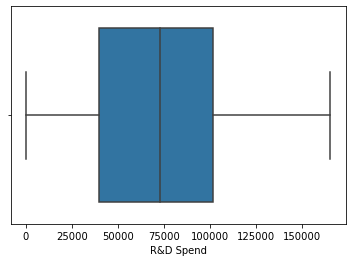

In [11]:
sn.boxplot(startups['R&D Spend'])

1. There are no outliers in the R & D spend column. 
2. The median line is at the centre of the box which means there is no skewness in the data.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

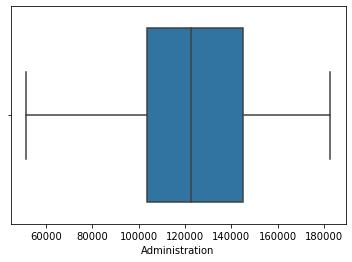

In [12]:
sn.boxplot(startups['Administration'])

1. There are no outliers in the Administration column. 
2. The median line is not at the centre of the box which means there is skewness in the data.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

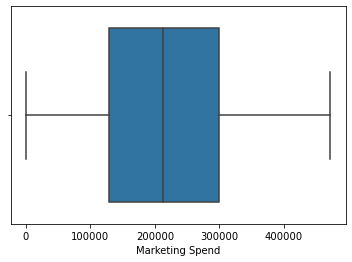

In [13]:
sn.boxplot(startups['Marketing Spend'])

1. There are no outliers in the Marketing Spend column. 
2. The median line is at the centre of the box which means there is no skewness in the data.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

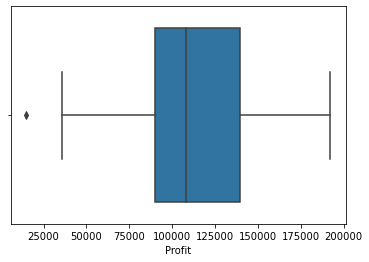

In [14]:
sn.boxplot(startups['Profit'])

1. There is an outliers in the Profit column. The value is less than 25,000 which means the company made once very less profit.
2. The median line is towars the upper portion of the box which means there is positive skewness in the data.

### Pair plots

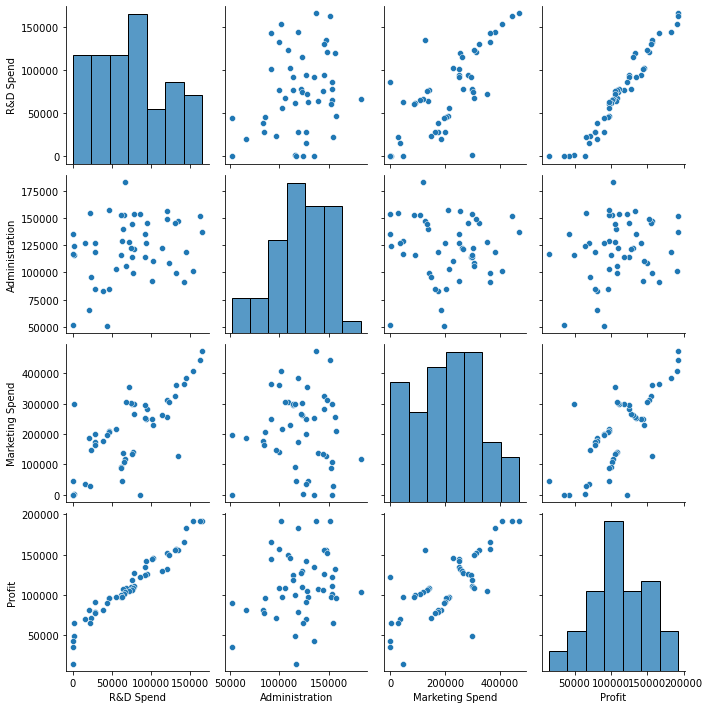

In [15]:
sn.pairplot(startups)

<AxesSubplot:>

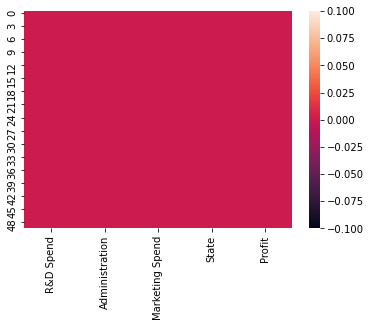

In [16]:
sn.heatmap(startups.isnull())

We can check missing values by using isna() method as well.

In [17]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
startups['State'].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

In [19]:
startups = pd.get_dummies(startups, columns=['State'])
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<AxesSubplot:>

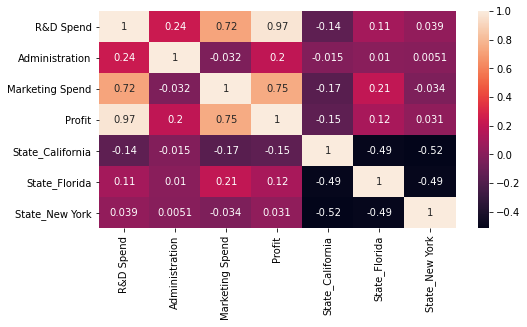

In [20]:
plt.figure(figsize=(8,4))
sn.heatmap(startups.corr(),annot = True)

In [21]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [22]:
startups.rename(columns={'Marketing Spend':'Marketing'},inplace=True)

In [23]:
startups.rename(columns={'R&D Spend':'RD'},inplace=True)

In [24]:
startups.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [25]:
startups.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


##### We need to standardize our data as we have used One Hot encoding technique and changed State variable. The scale is very different for States and the other variables so we will use Standard Scaler technique for standardizing the other variables

In [26]:
startup_std = startups.copy()

In [27]:
col_names = ['RD', 'Administration','Marketing','State_California','State_Florida','State_NewYork']
features = startup_std[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [28]:
startup_std[col_names] = features
print(startup_std)

          RD  Administration  Marketing     Profit  State_California  \
0   2.016411        0.560753   2.153943  192261.83         -0.717741   
1   1.955860        1.082807   1.923600  191792.06          1.393261   
2   1.754364       -0.728257   1.626528  191050.39         -0.717741   
3   1.554784       -0.096365   1.422210  182901.99         -0.717741   
4   1.504937       -1.079919   1.281528  166187.94         -0.717741   
5   1.279800       -0.776239   1.254210  156991.12         -0.717741   
6   1.340066        0.932147  -0.688150  156122.51          1.393261   
7   1.245057        0.871980   0.932186  155752.60         -0.717741   
8   1.030369        0.986952   0.830887  152211.77         -0.717741   
9   1.091819       -0.456640   0.776107  149759.96          1.393261   
10  0.620398       -0.387599   0.149807  146121.95         -0.717741   
11  0.593085       -1.065540   0.319834  144259.40          1.393261   
12  0.443260        0.215449   0.320617  141585.52         -0.71

In [29]:
#fitting linear regression model
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit()

In [30]:
model.params

Intercept           112012.639200
RD                   36626.428252
Administration        -748.997469
Marketing             3266.215194
State_California       -24.067160
State_Florida           69.030531
State_NewYork          -43.909408
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues) 

Intercept           83.910541
RD                  17.368580
Administration      -0.517012
Marketing            1.573889
State_California    -0.026765
State_Florida        0.074905
State_NewYork       -0.049316
dtype: float64 
 Intercept           3.369385e-50
RD                  2.578772e-21
Administration      6.077373e-01
Marketing           1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_NewYork       9.608905e-01
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.34e-27
Time:                        23:28:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
RD                3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
Administration    -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
Marketing         3266.2152   2075.251      1.574      0.123    -916.178    7448.608
State_California   -24.0672    899.198     -0.027      0.979   -1836.281    1788.147
State_Florida       69.0305    921.579      0.075      0.941   -1788.289    1926.350
State_NewYork      -43.9094    890.365     -0.049      0.961   -1838.322    1750.503
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### If we observe the p values in above table, we can see that the p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork as well.

##### We need to check how these variables individually affect Profit value. So we will build a Simple Linear Regression model for each variable and check the p values

In [34]:
#Simple Linear Regression between Profit and Administration
model_ad = smf.ols('Profit~Administration',data=startup_std).fit()

In [35]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.162
Time:                        23:28:18   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   5642.021     19.853      0.000    1.01e+05    1.23e+05
Administration  8008.8084   5642.021      1.419      0.162   -3335.236    1.94e+04
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The p value is 0.162 which is greater than 0.05 and we also saw correlation value between Profit and Administration is very less which is 0.2.

##### We can say that the Administration variable is not important in predicting the Profit values

In [36]:
#Simple Linear Regression between Profit and Marketing Spend
model_mkt = smf.ols('Profit~Marketing',data=startup_std).fit()

In [37]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 06 May 2021   Prob (F-statistic):           4.38e-10
Time:                        23:28:18   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   3823.911     29.293      0.000    1.04e+05     1.2e+05
Marketing   2.984e+04   3823.911      7.803      0.000    2.21e+04    3.75e+04
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We could see that the p-value for Marketing Spend is 0 which is less than 0.05 and also the correlation value between Profit and Marketing Spend is 0.75 so the Profit is actually dependent on Marketing Spend.

##### But when we used Marketing Spend to fit the model the p -value came as 0.123 (greater than 0.05). This means that Marketing Spend individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

In [38]:
#Simple Linear Regression between Profit and R&D Spend
model_rd = smf.ols('Profit~RD',data=startup_std).fit()

In [39]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.50e-32
Time:                        23:28:18   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1331.673     84.114      0.000    1.09e+05    1.15e+05
RD          3.882e+04   1331.673     29.151      0.000    3.61e+04    4.15e+04
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We could see that the p-value for R&D Spend is 0 which is less than 0.05 and also the correlation value between Profit and  R&D Spend is 0.97 so the Profit is actually dependent on R&D Spend.


In [40]:
#Simple Linear Regression between Profit and State_California

model_sc = smf.ols('Profit~State_California',data=startup_std).fit()

In [41]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.312
Time:                        23:28:19   Log-Likelihood:                -600.12
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.12e+05   5697.651     19.659      0.000    1.01e+05    1.23e+05
State_California -5819.0557   5697.651     -1.021      0.312   -1.73e+04    5636.840
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We could see that the p-value for State_California is 0.312 which is more than 0.05 and also the correlation value between Profit and State_California is -0.15 so the Profit is actually not dependent on State_California variable.


In [42]:
#Simple Linear Regression between Profit and State_Florida¶
model_sf = smf.ols('Profit~State_Florida',data=startup_std).fit()

In [43]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.421
Time:                        23:28:19   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.12e+05   5720.181     19.582      0.000    1.01e+05    1.24e+05
State_Florida  4638.2720   5720.181      0.811      0.421   -6862.924    1.61e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We could see that the p-value for State_Florida is 0.421 which is more than 0.05 and also the correlation value between Profit and State_Florida is 0.12 so the Profit is actually not dependent on State_Florida variable.


In [44]:
#Simple Linear Regression between Profit and State_NewYork
model_sny = smf.ols('Profit~State_NewYork',data=startup_std).fit()

In [45]:
model_sny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Thu, 06 May 2021   Prob (F-statistic):              0.829
Time:                        23:28:19   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.12e+05   5756.391     19.459      0.000       1e+05    1.24e+05
State_NewYork  1251.6012   5756.391      0.217      0.829   -1.03e+04    1.28e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We could see that the p-value for State_NewYork is 0.829 which is more than 0.05 and also the correlation value between Profit and State_NewYork is 0.031 so the Profit is actually not dependent on State_NewYork variable.


In [46]:
#Calculating VIF as well to check collinearity
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_NewYork',data=startup_std).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_sny = smf.ols('State_NewYork~RD+Administration+Marketing+State_California+State_Florida',data=startup_std).fit().rsquared  
vif_sny = 1/(1-rsq_sny)


# Storing vif values in a data frame
d1 = {'Features':['RD','Administration','Marketing','State_California','State_Florida','State_NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-46-a47f227acb87>:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-46-a47f227acb87>:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-46-a47f227acb87>:18: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sny = 1/(1-rsq_sny)


,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


##### Here, VIF value is infinite for the State variables, so we can confirm collinearlity does not exist between them

##### From the above Simple Regression models and VIF values we can say that the States and Administration are not significant variaables for predicting the Profit values.

##### We will build a model using R&D Spend and Marketing Spend

In [47]:
#Simple Linear Regression between Profit and R&D Spend, Marketing Spend
model_rd_m = smf.ols('Profit~RD+Marketing',data=startup_std).fit()

In [48]:
model_rd_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 06 May 2021   Prob (F-statistic):           2.16e-31
Time:                        23:28:19   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1295.556     86.459      0.000    1.09e+05    1.15e+05
RD           3.62e+04   1878.872     19.266      0.000    3.24e+04       4e+04
Marketing   3620.6842   1878.872      1.927      0.060    -159.118    7400.487
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
(model_mkt.rsquared,model_mkt.aic)

(0.5591535746115515, 1164.3567921009328)

In [50]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, 1058.8730295624773)

In [51]:
(model_rd_m.rsquared,model_rd_m.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

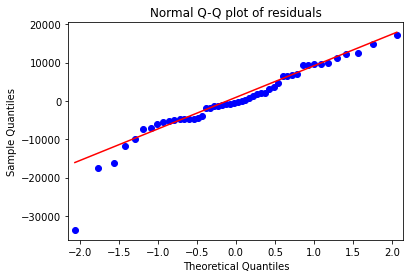

In [52]:
#Model validation using Residual analysis
#Q-Q plot to check normality of errors
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd_m.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [53]:
list(np.where(model_rd_m.resid<-20000))

[array([49], dtype=int64)]

We can see most of the points are very close and on the line in the above plot. Although, there is a data point (observation no.49) that is very far away from the straight line and we will try to remove the influencer point with the help of Cook's distance, Hat - point method later below. 


In [54]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

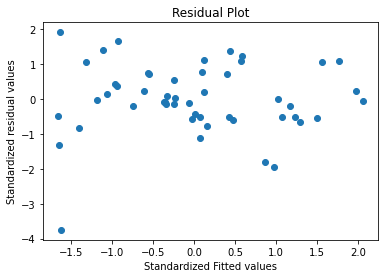

In [55]:
plt.scatter(get_standardized_values(model_rd_m.fittedvalues),
            get_standardized_values(model_rd_m.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance

### Residuals vs Regressors

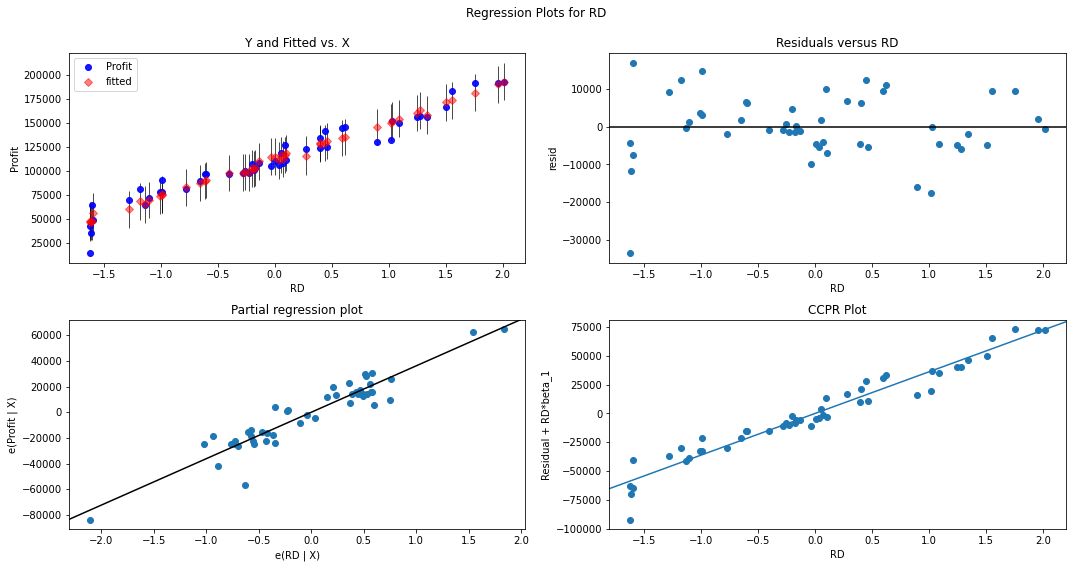

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd_m, "RD", fig=fig)
plt.show()

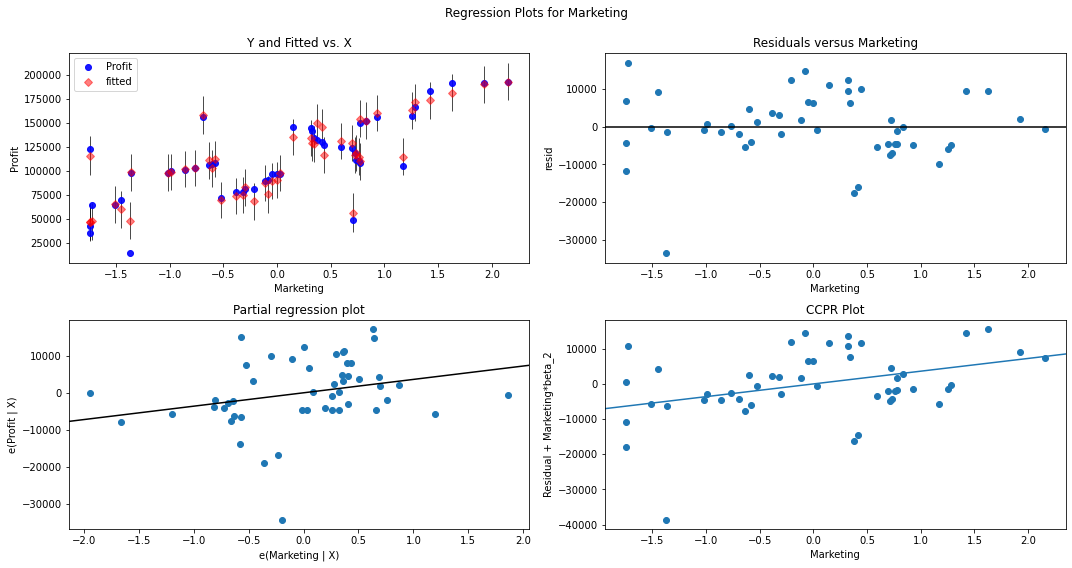

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd_m, "Marketing", fig=fig)
plt.show()

There is no pattern in the Residual vs R & D Spend plot, so we can say there is a linear relation and no error variance

In [58]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers using Cook's distance
model_influence = model_rd_m.get_influence()
(c, _) = model_influence.cooks_distance

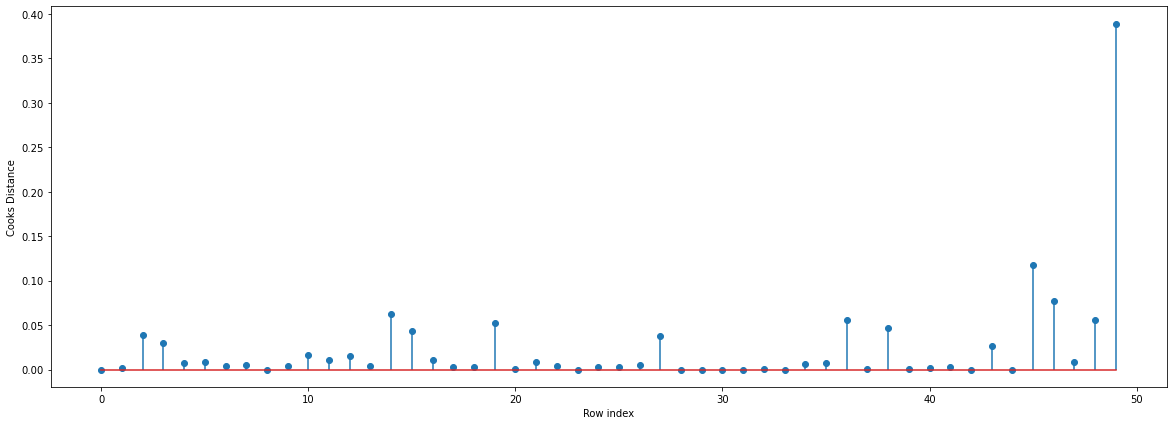

In [59]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_std)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
(np.argmax(c),np.max(c))

(49, 0.38948862279249125)

We can see that the 49th observation is an Influencer point and has more distance than other data points. We will delete this data point to further increase our accuracy

In [61]:
# Improving the model
startup=startup_std.drop(startup_std.index[[49]],axis=0).reset_index()

In [62]:
startup.shape

(49, 8)

In [63]:
startup.head()

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,2.016411,0.560753,2.153943,192261.83,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,191792.06,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,191050.39,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,182901.99,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,166187.94,-0.717741,1.457738,-0.717741


In [64]:
#Build the model
final_model= smf.ols('Profit~RD+Marketing',data = startup).fit()

In [65]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

#### The adjusted R sqaured value of the model is 0.961. So we can say the accuracy of our model is 96%